# Data analyzing of the 360-degree videos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from datetime import datetime as datetime
import time

In [2]:
# Configure panda to show all columns
pd.set_option('display.max_columns', None)

### Merging all the traces found

In [3]:
path = '../traces' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)

frame = pd.concat(li, ignore_index=True)

og_frame = pd.concat(li, ignore_index=True)

In [4]:
# Convert upload date (yyymmdd) to "days since upload"

current_time = datetime.now().timestamp()

for i in frame.index:
    try:
        upload_time = datetime.strptime(str(frame['upload_date'][i]), '%Y%m%d').timestamp()
        ms_since_upload = current_time - upload_time
        days_since_upload = ms_since_upload / 86400
        
        frame['upload_date'][i] =  days_since_upload
    except:
        pass

<ipython-input-4-262d4e5fef3c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['upload_date'][i] =  days_since_upload


### Inspect data

In [5]:
frame.head()

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,extractor,webpage_url_basename,extractor_key,playlist,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,fulltitle,_filename,format_note,preference,url,manifest_url,tbr,protocol,player_url,http_headers
0,yfJR4uwmb5k,NOAH OFFICIAL,OfficialNoahMusic,http://www.youtube.com/user/OfficialNoahMusic,UCXWOf2fdWef8tbv1X27JHzw,http://www.youtube.com/channel/UCXWOf2fdWef8tb...,35,NaN,Noah,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Menemaniku,[{'url': 'https://i.ytimg.com/vi/yfJR4uwmb5k/h...,Lukman NOAH Tes Kamera - Persiapan Nonton Noah...,[Music],"[noah official, video terbaru noah, noah, lagu...",{},{},245,0,NaN,NaN,https://www.youtube.com/watch?v=yfJR4uwmb5k,43134,2641.0,20.0,4.969936,"[{'format_id': '249', 'url': 'https://r6---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,Menemaniku,Noah,Single - Menemaniku,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi/yfJR4uwmb5k/maxresdefau...,yfJR4uwmb5k,NaN,"[{'format_id': '137', 'url': 'https://r6---sn-...",137 - 1920x960 (1080s)+251 - audio only (tiny),137+251,1920,960,NaN,30,avc1.640028,NaN,NaN,opus,160.0,mp4,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NOE-RTLercU,CreatorUp,CreatorUpNetwork,http://www.youtube.com/user/CreatorUpNetwork,UCeEqIv7lVwOOLnwxuuhQFuQ,http://www.youtube.com/channel/UCeEqIv7lVwOOLn...,77,NaN,None,Experience the World Breaking Record in 331mph...,None,[{'url': 'https://i.ytimg.com/vi/NOE-RTLercU/h...,Experiencing the fastest car in the world - Am...,[Sports],"[ssc tuatara, ssc tuatara top speed, ssc tuata...",{},{},171,0,NaN,NaN,https://www.youtube.com/watch?v=NOE-RTLercU,118686,852.0,132.0,4.463415,"[{'format_id': '249', 'url': 'https://r7---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/NOE-RTLercU/maxres...,NOE-RTLercU,NaN,"[{'format_id': '266', 'url': 'https://r7---sn-...",266 - 3840x2160 (2160s)+251 - audio only (tiny),266+251,3840,2160,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,Experience the World Breaking Record in 331mph...,Experience the World Breaking Record in 331mph...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6pscyYZOlZY,TycerVR 360 Videos,TycerX,http://www.youtube.com/user/TycerX,UC6AhuKHE0b2SdAnPUFpmFJQ,http://www.youtube.com/channel/UC6AhuKHE0b2SdA...,38,NaN,None,Can you FIND the IMPOSTER in Among US! 360/VR!...,None,[{'url': 'https://i.ytimg.com/vi/6pscyYZOlZY/h...,"Sent on a new training mission, will YOU FIND ...",[Gaming],"[among us 360, amongus 360, imposter 360, 360 ...",{},{},630,0,NaN,NaN,https://www.youtube.com/watch?v=6pscyYZOlZY,49344,1304.0,51.0,4.849446,"[{'format_id': '249', 'url': 'https://r1---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/6pscyYZOlZY/maxres...,6pscyYZOlZY,NaN,"[{'format_id': '305', 'url': 'https://r1---sn-...",305 - 3840x1920 (2160s60)+251 - audio only (tiny),305+251,3840,1920,NaN,60,avc1.640034,NaN,NaN,opus,160.0,mp4,Can you FIND the IMPOSTER in Among US! 360/VR!...,Can you FIND the IMPOSTER in Among US! 360_VR!...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-xNN-bJQ4vI,Discovery,DiscoveryNetworks,http://www.youtube.com/user/DiscoveryNetworks,UCqOoboPm3uhY_YXhvhmL-WA,http://www.youtube.com/channel/UCqOoboPm3uhY_Y...,1762,NaN,None,Mega Coaster: Get Ready for the Drop (360 Video),None,[{'url': 'https://i.ytimg.com/vi/-xNN-bJQ4vI/h...,Strap in for the ride of a lifetime on a twist...,[Entertainment],"[samsung gear vr, coas

In [6]:
len(frame.id.unique())

2298

In [7]:
frame.describe()

,upload_date,duration,age_limit,annotations,view_count,like_count,dislike_count,average_rating,is_live,series,season_number,episode_number,release_date,release_year,playlist,playlist_index,requested_subtitles,width,height,resolution,fps,vbr,stretched_ratio,abr,preference,tbr,player_url
count,2302.000000,2302.000000,2302.000000,0.0,2.302000e+03,2.132000e+03,1770.000000,2182.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2302.000000,2302.000000,0.0,2302.000000,0.0,0.0,2172.000000,0.0,3.000000,0.0
mean,795.882276,393.405734,0.093831,NaN,1.759241e+06,1.539404e+04,2063.243503,4.594376,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3565.863597,1928.582103,NaN,35.119027,NaN,NaN,150.629834,NaN,4510.555000,NaN
std,640.578130,1201.966913,1.296492,NaN,7.628881e+06,5.951370e+04,16190.421422,0.481638,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.997511,659.566622,NaN,12.939524,NaN,NaN,14.948682,NaN,355.515553,NaN
min,22.000000,0.000000,0.000000,NaN,1.000000e+00,2.000000e+00,2.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.000000,480.000000,NaN,6.000000,NaN,NaN,128.000000,NaN,4100.041000,NaN
25%,141.000000,102.000000,0.000000,NaN,1.116250e+03,1.800000e+01,9.000000,4.443419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,1920.000000,NaN,30.000000,NaN,NaN,128.000000,NaN,4407.926500,NaN
50%,702.500000,183.000000,0.000000,NaN,3.632500e+04,4.365000e+02,84.000000,4.698939,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2048.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
75%,1373.000000,348.500000,0.000000,NaN,6.111262e+05,6.859750e+03,833.000000,4.918437,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2160.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
max,2128.000000,42900.000000,18.000000,NaN,2.155207e+08,1.137600e+06,634827.000000,5.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8640.000000,8192.000000,NaN,60.000000,NaN,NaN,256.000000,NaN,4715.812000,NaN


In [8]:
print(df.columns.tolist())

['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 'upload_date', 'license', 'creator', 'title', 'alt_title', 'thumbnails', 'description', 'categories', 'tags', 'subtitles', 'automatic_captions', 'duration', 'age_limit', 'annotations', 'chapters', 'webpage_url', 'view_count', 'like_count', 'dislike_count', 'average_rating', 'formats', 'is_live', 'start_time', 'end_time', 'series', 'season_number', 'episode_number', 'track', 'artist', 'album', 'release_date', 'release_year', 'extractor', 'webpage_url_basename', 'extractor_key', 'playlist', 'playlist_index', 'thumbnail', 'display_id', 'requested_subtitles', 'requested_formats', 'format', 'format_id', 'width', 'height', 'resolution', 'fps', 'vcodec', 'vbr', 'stretched_ratio', 'acodec', 'abr', 'ext', 'fulltitle', '_filename']


In [9]:
len(frame['categories'].apply(sorted).transform(tuple).unique())

15

In [10]:
categories = pd.DataFrame(frame['categories'].apply(sorted).transform(tuple).unique())

In [11]:
categories

,0
0,"(Music,)"
1,"(Sports,)"
2,"(Gaming,)"
3,"(Entertainment,)"
4,"(People & Blogs,)"
5,"(Pets & Animals,)"
6,"(Film & Animation,)"
7,"(Science & Technology,)"
8,"(Travel & Events,)"
9,"(News & Politics,)"


In [12]:
grouped = frame.groupby("categories")

In [13]:
newFrame = frame['categories'].apply(sorted).transform(tuple)

In [14]:
frame["tupleCat"] = newFrame

In [15]:
frame["tupleCat"]

0                  (Music,)
1                 (Sports,)
2                 (Gaming,)
3          (Entertainment,)
4                 (Gaming,)
               ...         
2297     (News & Politics,)
2298               (Music,)
2299      (Pets & Animals,)
2300    (Film & Animation,)
2301           (Education,)
Name: tupleCat, Length: 2302, dtype: object

In [16]:
frame.groupby("tupleCat").agg("count")["id"]

tupleCat
(Autos & Vehicles,)          60
(Comedy,)                    40
(Education,)                169
(Entertainment,)            319
(Film & Animation,)         205
(Gaming,)                   535
(Howto & Style,)             22
(Music,)                    141
(News & Politics,)           54
(Nonprofits & Activism,)     28
(People & Blogs,)           253
(Pets & Animals,)            42
(Science & Technology,)     101
(Sports,)                   116
(Travel & Events,)          217
Name: id, dtype: int64

Note: make a bar chart of category video count

## Plotting relations between categories and other characteristics

### Upload date

C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


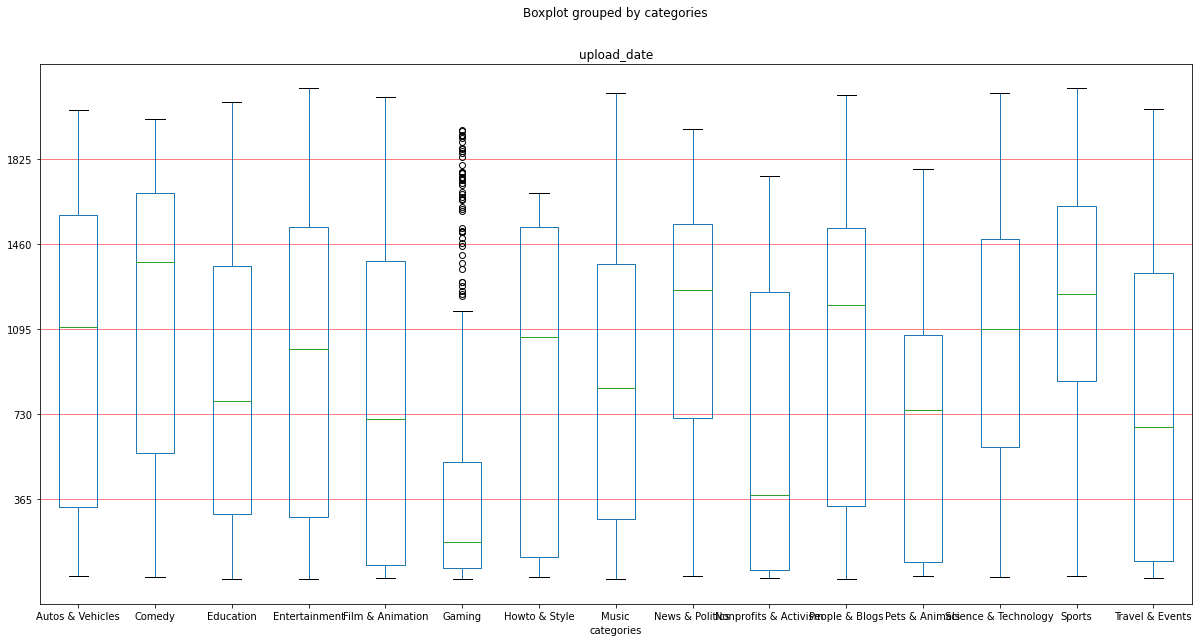

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['upload_date'], ax=ax, grid=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([365, 730, 1095, 1460, 1825])

### Popularity

#### Plot popularity

Note: like/dislike ratio is not being used for calculating the popularity of a video (see paragraph under graphs).

In [18]:
# For each entry, calculate its popularity
frame['popularity'] = 0.0 # initial float value
frame['like_dislike_ratio'] = 0.0

for i in frame.index:
    view_count = frame['view_count'][i]
    days_since_upload = frame['upload_date'][i]
    like_count = frame['like_count'][i]
    dislike_count = frame['dislike_count'][i]

    like_dislike_ratio = like_count / dislike_count

    popularity = (view_count / float(days_since_upload))# * like_dislike_ratio

    frame['like_dislike_ratio'][i] = like_dislike_ratio
    frame['popularity'][i] =  popularity

<ipython-input-18-25ff2b57a10d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['like_dislike_ratio'][i] = like_dislike_ratio
<ipython-input-18-25ff2b57a10d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['popularity'][i] =  popularity


C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


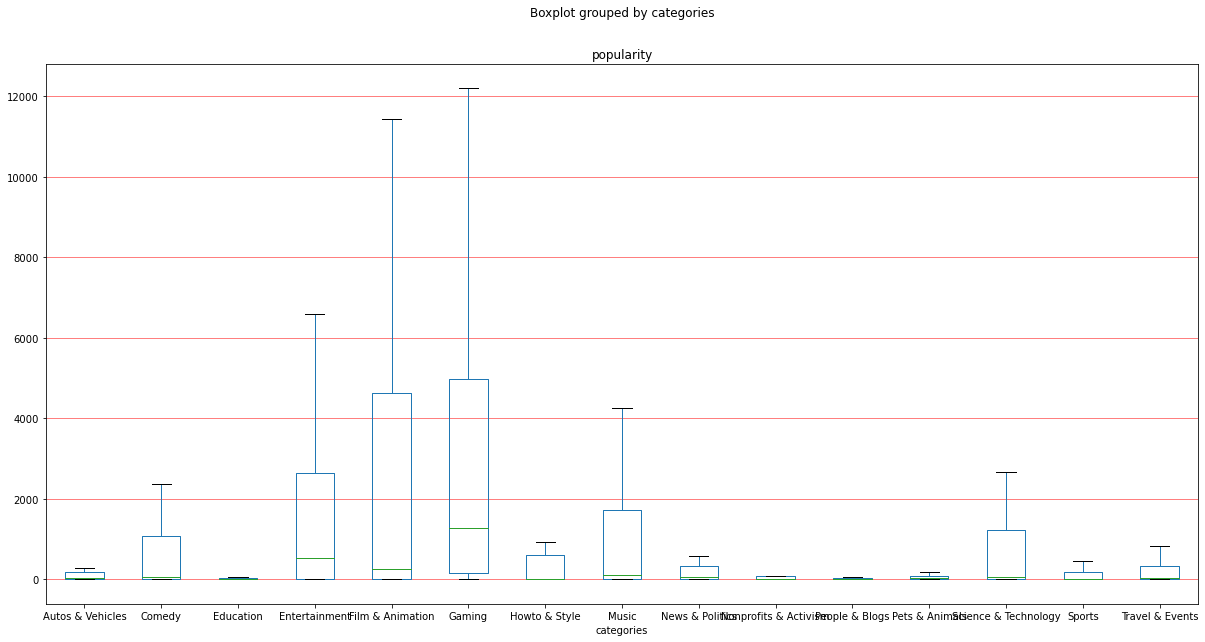

In [19]:
# Plot popularity

fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['popularity'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Plot like/dislike ratio

C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


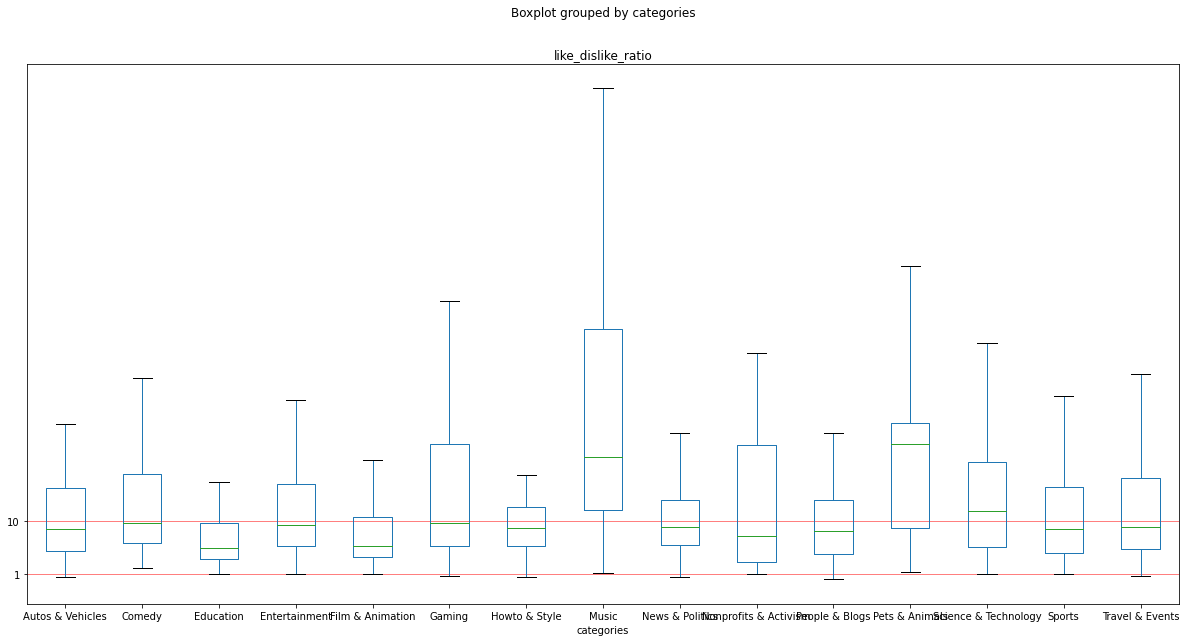

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['like_dislike_ratio'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([1, 10])

In the boxplot above, we find that the ratio between likes and dislikes on a video is hardly ever below 1. Therefore, we may conclude that viewers are more inclined to indicate which videos they like than to indicate which videos they dislike. And indeed, content creators usually encourage their audience to like their videos. Therefore, the ratio between likes and dislikes seems to be positively dominated by a relatively high number of likes.

This means that the like/dislike ratio may overrepresent the positive perception and we must be careful with using this metric.

### Available representations

#### Number of representations

Not solved yet.

In [21]:
og_frame

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,extractor,webpage_url_basename,extractor_key,playlist,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,fulltitle,_filename,format_note,preference,url,manifest_url,tbr,protocol,player_url,http_headers
0,yfJR4uwmb5k,NOAH OFFICIAL,OfficialNoahMusic,http://www.youtube.com/user/OfficialNoahMusic,UCXWOf2fdWef8tbv1X27JHzw,http://www.youtube.com/channel/UCXWOf2fdWef8tb...,20201204,NaN,Noah,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Menemaniku,[{'url': 'https://i.ytimg.com/vi/yfJR4uwmb5k/h...,Lukman NOAH Tes Kamera - Persiapan Nonton Noah...,[Music],"[noah official, video terbaru noah, noah, lagu...",{},{},245,0,NaN,NaN,https://www.youtube.com/watch?v=yfJR4uwmb5k,43134,2641.0,20.0,4.969936,"[{'format_id': '249', 'url': 'https://r6---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,Menemaniku,Noah,Single - Menemaniku,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi/yfJR4uwmb5k/maxresdefau...,yfJR4uwmb5k,NaN,"[{'format_id': '137', 'url': 'https://r6---sn-...",137 - 1920x960 (1080s)+251 - audio only (tiny),137+251,1920,960,NaN,30,avc1.640028,NaN,NaN,opus,160.0,mp4,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NOE-RTLercU,CreatorUp,CreatorUpNetwork,http://www.youtube.com/user/CreatorUpNetwork,UCeEqIv7lVwOOLnwxuuhQFuQ,http://www.youtube.com/channel/UCeEqIv7lVwOOLn...,20201023,NaN,None,Experience the World Breaking Record in 331mph...,None,[{'url': 'https://i.ytimg.com/vi/NOE-RTLercU/h...,Experiencing the fastest car in the world - Am...,[Sports],"[ssc tuatara, ssc tuatara top speed, ssc tuata...",{},{},171,0,NaN,NaN,https://www.youtube.com/watch?v=NOE-RTLercU,118686,852.0,132.0,4.463415,"[{'format_id': '249', 'url': 'https://r7---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/NOE-RTLercU/maxres...,NOE-RTLercU,NaN,"[{'format_id': '266', 'url': 'https://r7---sn-...",266 - 3840x2160 (2160s)+251 - audio only (tiny),266+251,3840,2160,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,Experience the World Breaking Record in 331mph...,Experience the World Breaking Record in 331mph...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6pscyYZOlZY,TycerVR 360 Videos,TycerX,http://www.youtube.com/user/TycerX,UC6AhuKHE0b2SdAnPUFpmFJQ,http://www.youtube.com/channel/UC6AhuKHE0b2SdA...,20201201,NaN,None,Can you FIND the IMPOSTER in Among US! 360/VR!...,None,[{'url': 'https://i.ytimg.com/vi/6pscyYZOlZY/h...,"Sent on a new training mission, will YOU FIND ...",[Gaming],"[among us 360, amongus 360, imposter 360, 360 ...",{},{},630,0,NaN,NaN,https://www.youtube.com/watch?v=6pscyYZOlZY,49344,1304.0,51.0,4.849446,"[{'format_id': '249', 'url': 'https://r1---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/6pscyYZOlZY/maxres...,6pscyYZOlZY,NaN,"[{'format_id': '305', 'url': 'https://r1---sn-...",305 - 3840x1920 (2160s60)+251 - audio only (tiny),305+251,3840,1920,NaN,60,avc1.640034,NaN,NaN,opus,160.0,mp4,Can you FIND the IMPOSTER in Among US! 360/VR!...,Can you FIND the IMPOSTER in Among US! 360_VR!...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-xNN-bJQ4vI,Discovery,DiscoveryNetworks,http://www.youtube.com/user/DiscoveryNetworks,UCqOoboPm3uhY_YXhvhmL-WA,http://www.youtube.com/channel/UCqOoboPm3uhY_Y...,20160313,NaN,None,Mega Coaster: Get Ready for the Drop (360 Video),None,[{'url': 'https://i.ytimg.com/vi/-xNN-bJQ4vI/h...,Strap in for the ride of a lifetime on a twist...,[Entertainment],"

id
uploader
uploader_id
uploader_url
channel_id
channel_url
upload_date
license
creator
title
alt_title
thumbnails
description
categories
tags
subtitles
automatic_captions
duration
age_limit
annotations
chapters
webpage_url
view_count
like_count
dislike_count
average_rating
formats
is_live
start_time
end_time
series
season_number
episode_number
track
artist
album
release_date
release_year
extractor
webpage_url_basename
extractor_key
playlist
playlist_index
thumbnail
display_id
requested_subtitles
requested_formats
format
format_id
width
height
resolution
fps
vcodec
vbr
stretched_ratio
acodec
abr
ext
fulltitle
_filename
format_note
preference
url
manifest_url
tbr
protocol
player_url
http_headers
available_representations


C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


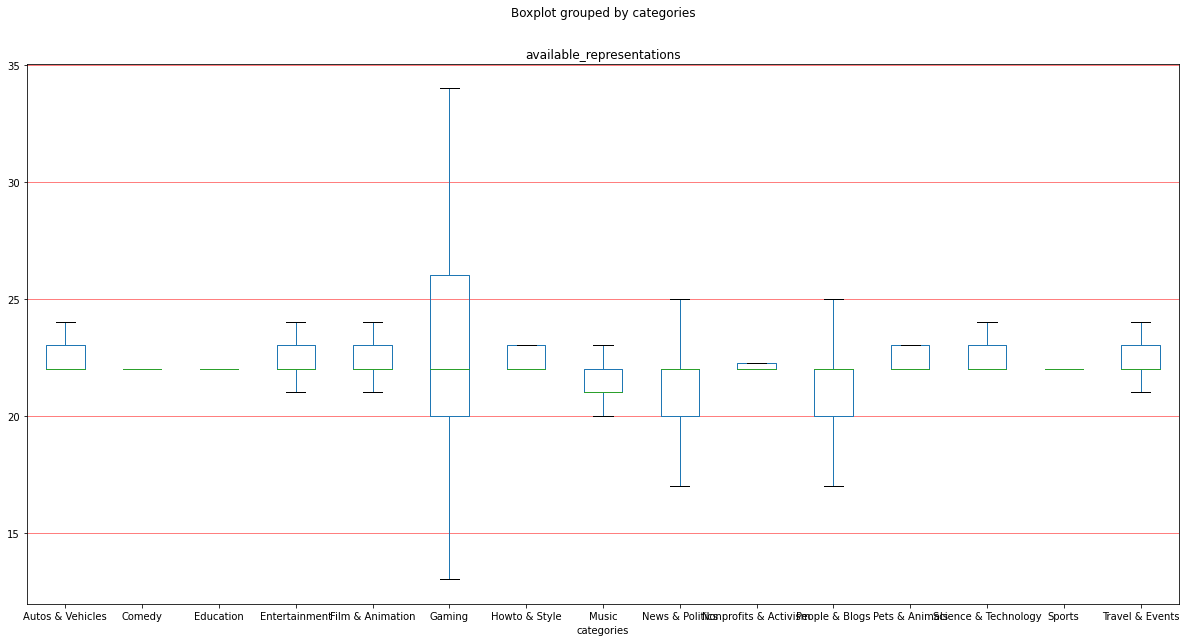

In [22]:
df1 = og_frame.copy()
df1['available_representations'] = df1['formats'].str.len()

for row in df1:
    for item in df1[row]:
        print(row)
        break
#         if df1[col][row].vcodec == "none":
#             df1.drop(row, axis=0)

fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['available_representations'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

In [23]:
# df1 = (pd.concat({i: pd.DataFrame(x) for i, x in frame.pop('formats').items()})
#          .reset_index(level=1, drop=True)
#          .join(frame, rsuffix='_shared')
#          .reset_index(drop=True))

# df1 = df1[df1.vcodec != "none

og_frame

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,extractor,webpage_url_basename,extractor_key,playlist,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,fulltitle,_filename,format_note,preference,url,manifest_url,tbr,protocol,player_url,http_headers
0,yfJR4uwmb5k,NOAH OFFICIAL,OfficialNoahMusic,http://www.youtube.com/user/OfficialNoahMusic,UCXWOf2fdWef8tbv1X27JHzw,http://www.youtube.com/channel/UCXWOf2fdWef8tb...,20201204,NaN,Noah,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Menemaniku,[{'url': 'https://i.ytimg.com/vi/yfJR4uwmb5k/h...,Lukman NOAH Tes Kamera - Persiapan Nonton Noah...,[Music],"[noah official, video terbaru noah, noah, lagu...",{},{},245,0,NaN,NaN,https://www.youtube.com/watch?v=yfJR4uwmb5k,43134,2641.0,20.0,4.969936,"[{'format_id': '249', 'url': 'https://r6---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,Menemaniku,Noah,Single - Menemaniku,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi/yfJR4uwmb5k/maxresdefau...,yfJR4uwmb5k,NaN,"[{'format_id': '137', 'url': 'https://r6---sn-...",137 - 1920x960 (1080s)+251 - audio only (tiny),137+251,1920,960,NaN,30,avc1.640028,NaN,NaN,opus,160.0,mp4,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,Lukman NOAH Tes Kamera - Persiapan Nonton NOAH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NOE-RTLercU,CreatorUp,CreatorUpNetwork,http://www.youtube.com/user/CreatorUpNetwork,UCeEqIv7lVwOOLnwxuuhQFuQ,http://www.youtube.com/channel/UCeEqIv7lVwOOLn...,20201023,NaN,None,Experience the World Breaking Record in 331mph...,None,[{'url': 'https://i.ytimg.com/vi/NOE-RTLercU/h...,Experiencing the fastest car in the world - Am...,[Sports],"[ssc tuatara, ssc tuatara top speed, ssc tuata...",{},{},171,0,NaN,NaN,https://www.youtube.com/watch?v=NOE-RTLercU,118686,852.0,132.0,4.463415,"[{'format_id': '249', 'url': 'https://r7---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/NOE-RTLercU/maxres...,NOE-RTLercU,NaN,"[{'format_id': '266', 'url': 'https://r7---sn-...",266 - 3840x2160 (2160s)+251 - audio only (tiny),266+251,3840,2160,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,Experience the World Breaking Record in 331mph...,Experience the World Breaking Record in 331mph...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6pscyYZOlZY,TycerVR 360 Videos,TycerX,http://www.youtube.com/user/TycerX,UC6AhuKHE0b2SdAnPUFpmFJQ,http://www.youtube.com/channel/UC6AhuKHE0b2SdA...,20201201,NaN,None,Can you FIND the IMPOSTER in Among US! 360/VR!...,None,[{'url': 'https://i.ytimg.com/vi/6pscyYZOlZY/h...,"Sent on a new training mission, will YOU FIND ...",[Gaming],"[among us 360, amongus 360, imposter 360, 360 ...",{},{},630,0,NaN,NaN,https://www.youtube.com/watch?v=6pscyYZOlZY,49344,1304.0,51.0,4.849446,"[{'format_id': '249', 'url': 'https://r1---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,None,None,None,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/6pscyYZOlZY/maxres...,6pscyYZOlZY,NaN,"[{'format_id': '305', 'url': 'https://r1---sn-...",305 - 3840x1920 (2160s60)+251 - audio only (tiny),305+251,3840,1920,NaN,60,avc1.640034,NaN,NaN,opus,160.0,mp4,Can you FIND the IMPOSTER in Among US! 360/VR!...,Can you FIND the IMPOSTER in Among US! 360_VR!...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-xNN-bJQ4vI,Discovery,DiscoveryNetworks,http://www.youtube.com/user/DiscoveryNetworks,UCqOoboPm3uhY_YXhvhmL-WA,http://www.youtube.com/channel/UCqOoboPm3uhY_Y...,20160313,NaN,None,Mega Coaster: Get Ready for the Drop (360 Video),None,[{'url': 'https://i.ytimg.com/vi/-xNN-bJQ4vI/h...,Strap in for the ride of a lifetime on a twist...,[Entertainment],"

#### Average bitrate

In [24]:
# Create column for average bitrate (kbps)
df1['average_bitrate'] = 0.0

for i in df1.index:
    try:
        file_size_bytes = df1['filesize'][i]
        file_size_bits = file_size_bytes * 8
        
        duration = df1['duration'][i]
        
        average_bitrate = (file_size_bits / float(duration)) / 1000 # average bitrate in kbps
        
        df1['average_bitrate'][i] =  average_bitrate
    except:
        pass

C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


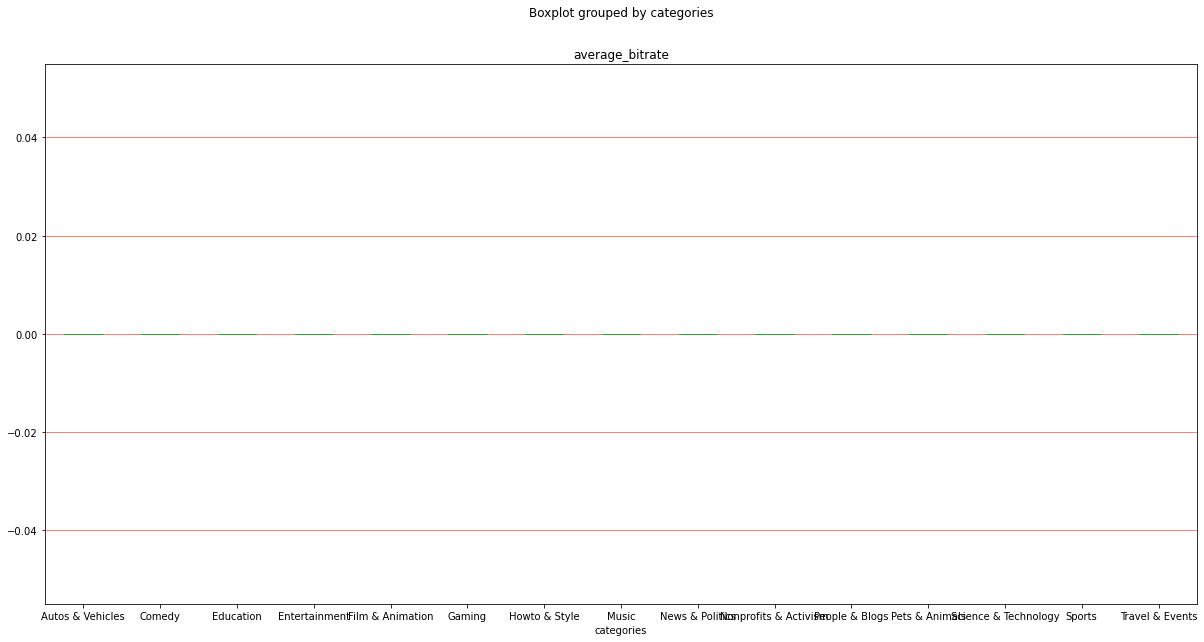

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['average_bitrate'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### File types

In [26]:
df1.groupby('categories')

In [27]:
df1.groupby('ext').agg('count')["id"]

ext
mp4     1411
webm     891
Name: id, dtype: int64

#### Framerates

C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


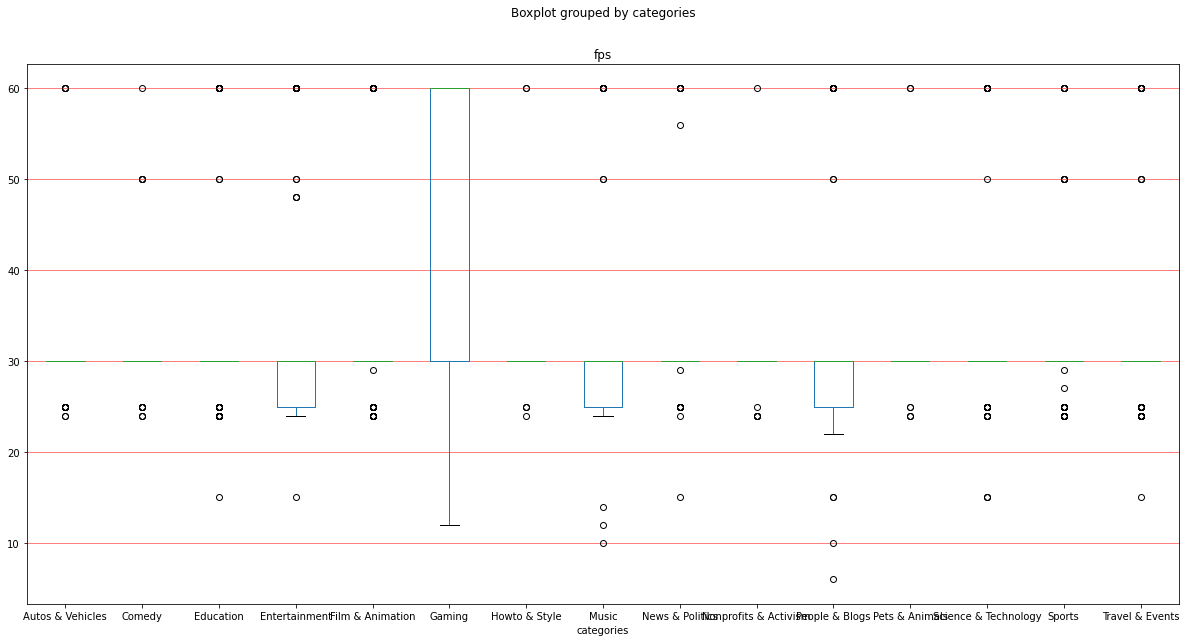

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['fps'], ax=ax, grid=False, showfliers=True)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Durations

C:\Users\omer_\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


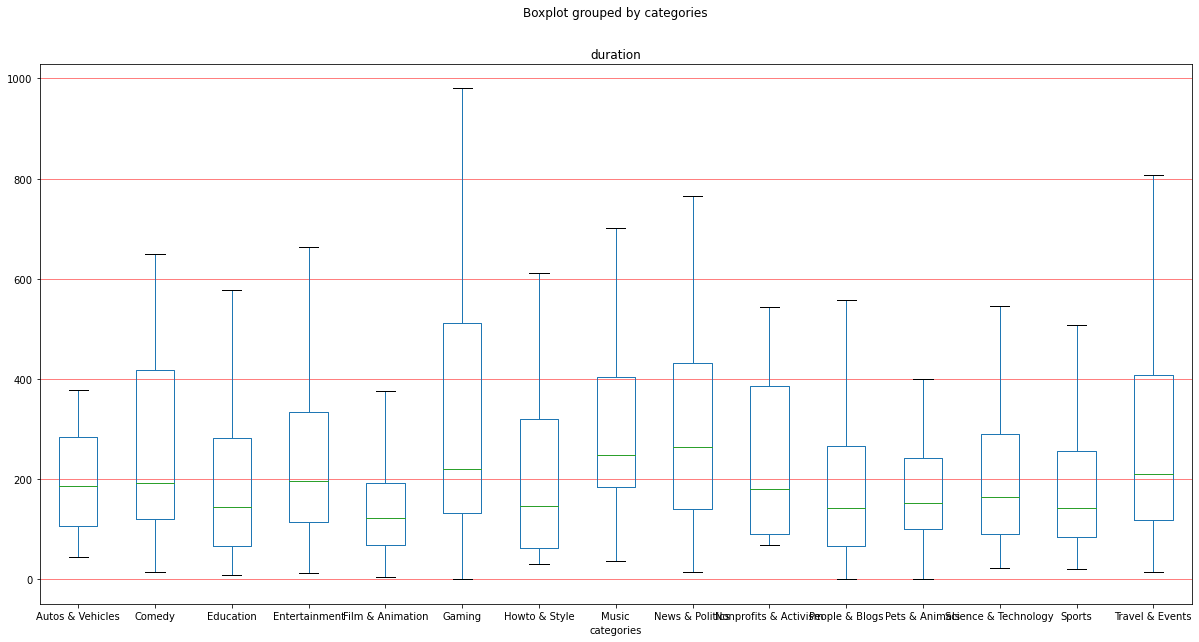

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['duration'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')